# MIT Parco Macchine Italia

## Data description and Data preparation


Il Ministero dei Trasporti pubblica in formato aperto i dati relativi al parco macchine circolante e le patenti di guida regione per regione.


### Parco circolante veicoli
- [Parco Circolante](http://dati.mit.gov.it/catalog/dataset/parco-circolante-dei-veicoli)

Questo dataset contiene il parco circolante dei veicoli su strada ( categorie Autoveicoli e Motoveicoli ) diviso per regione estratto dall'archivio nazionale dei veicoli gestito dalla Motorizzazione.

I dati si riferiscono alla situazione del parco vetture al 31/10/2017

-[Qui](http://dati.mit.gov.it/catalog/dataset/60a57c60-758c-4bd9-8d87-c286b797c289/resource/5d21aa87-a57d-42ee-b504-7da3218152be/download/metadata-parco-circolante-vetture.pdf) la scheda contenente i metadati


### Auto Eco friendly
Inoltre in questo notebook verrà segmentato il dataset complessivo del parco macchine sui veicoli "Eco_friendly" in modo da condurre un'analisi esplorativa nel notebook successivo

Questo primo notebook si occupa quindi di caricare tutti i dati del parco macchine regione per regione, eseguire alcune operazioni di utilità ed infine estratte un unico dataframe con solamente le auto che appartengono alle categorie scelte.
In particolare verrà filtrato il campo "alimentazione" per i seguenti valori:

- 'METANO'
- 'ELETTR'
- 'GPL'
- 'B/GPL'
- 'B/MET'
- 'IBRIDO BENZINA/ELETTRICO'
- 'IBRIDO GASOLIO/ELETTRICO'

In [34]:
%matplotlib inline 
import csv
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

mpl.rcParams['figure.figsize'] = (6.0, 10.0)

sns.set_context("notebook")
sns.set()
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("Set2", 10))

style.use('fivethirtyeight')

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [32]:
# Seaborn for pairplots
sns.set_context('talk', font_scale=1.2);

## Parco Macchine
### Part 1: Loading and Cleaning with Pandas - quick checks Parco macchine



In [5]:
folder_dati = "../data/parco"
folder = glob.glob('./'+folder_dati+'/*.csv')

list_ =[]
for file_ in folder:
    print (file_)
    name = (os.path.basename(file_)).split(".")[0]
    
    #leggo il dataset originario
    df = pd.read_csv(file_, sep=",", encoding="ISO-8859-1", decimal=",",low_memory=False)
    list_.append(df)
parco = pd.concat(list_)
len(parco)

./../data/parco/parco_circolante_Calabria.csv
./../data/parco/parco_circolante_Molise.csv
./../data/parco/parco_circolante_EmiliaRomagna.csv
./../data/parco/parco_circolante_Veneto.csv
./../data/parco/parco_circolante_Umbria.csv
./../data/parco/parco_circolante_Sardegna.csv
./../data/parco/parco_circolante_Liguria.csv
./../data/parco/parco_circolante_Puglia.csv
./../data/parco/parco_circolante_Abruzzo.csv
./../data/parco/parco_circolante_Lazio.csv
./../data/parco/parco_circolante_Piemonte.csv
./../data/parco/parco_circolante_FriuliVeneziaGiulia.csv
./../data/parco/parco_circolante_Lombardia.csv
./../data/parco/parco_circolante_Marche.csv
./../data/parco/parco_circolante_ValleAosta.csv
./../data/parco/parco_circolante_Basilicata.csv
./../data/parco/parco_circolante_Toscana.csv
./../data/parco/parco_circolante_TrentinoAltoAdige.csv
./../data/parco/parco_circolante_Sicilia.csv
./../data/parco/parco_circolante_Campania.csv


52165189

Il totale del parco macchine ammonta a **52.165.189 veicoli** (autoveicoli e motoveicoli)
Calcola il rapporto con il numero di abitanti.

In [4]:
#Cast data_immatricolazione to datetime
parco['data_immatricolazione'] = pd.to_datetime(parco['data_immatricolazione'])

In [5]:
parco.dtypes

id                                  int64
progressivo                         int64
tipo_veicolo                       object
destinazione                       object
uso                                object
comune_residenza                   object
provincia_residenza                object
regione_residenza                  object
eta_intestatario                  float64
sesso                              object
marca                              object
cilindrata                         object
alimentazione                      object
kw                                float64
data_immatricolazione      datetime64[ns]
classe_euro                       float64
emissioni_co2                      object
massa_complessiva                 float64
revisione_in_regola                object
assicurazione_in_regola            object
dtype: object

In [8]:
print(parco.shape)

(52165189, 20)


In [6]:
parco.head(5)

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,data_immatricolazione,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
0,1647312,124592,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ZUMPANO,COSENZA,CALABRIA,65.000,M,NaN,1990.00,BENZ,96.000,1974-01-01,0.000,NaN,1390.000,N,N
1,1647313,139878,M,TRICICLO PER TRASPORTO COSE,PROPRIO,MELICUCCO,REGGIO DI CALABRIA,CALABRIA,85.000,M,NaN,218.00,B/OLIO,8.000,NaT,0.000,NaN,1160.000,N,S
2,1647314,184563,M,MOTOCICLO PER TRASPORTO PERSONE,PROPRIO,CROTONE,CROTONE,CALABRIA,51.000,M,NaN,903.00,BENZ,56.000,1976-01-01,0.000,NaN,nan,S,S
3,1647363,957766,A,AUTOCARRO PER TRASPORTO DI COSE,PROPRIO,RENDE,COSENZA,CALABRIA,46.000,M,OPEL,1995.00,GASOL,84.000,2009-02-16,4.000,NaN,2770.000,N,N
4,1647602,4068491,A,AUTOCARRO PER TRASPORTO DI COSE,PROPRIO,CUTRO,CROTONE,CALABRIA,30.000,M,NaN,3455.00,GASOL,60.000,1976-01-01,0.000,NaN,3500.000,S,S


In [8]:
parco.describe()

,id,progressivo,eta_intestatario,kw,classe_euro,massa_complessiva
count,52165189.000,52165189.000,46312796.000,52116408.000,52165175.000,51906600.000
mean,26082595.000,26082595.000,53.726,65.268,3.240,1808.169
std,15058793.100,15058793.100,14.639,40.385,1.786,2268.266
min,1.000,1.000,0.000,0.000,0.000,0.000
25%,13041298.000,13041298.000,43.000,44.000,2.000,1305.000
50%,26082595.000,26082595.000,53.000,57.000,4.000,1560.000
75%,39123892.000,39123892.000,64.000,81.000,5.000,1885.000
max,52165189.000,52165189.000,2017.000,1000.000,6.000,99999.000


#### Check Valori nulli nel DataFrame Parco macchine completo

In [9]:
parco.isnull().sum()



id                                0
progressivo                       0
tipo_veicolo                      0
destinazione                  31003
uso                           31043
comune_residenza              17731
provincia_residenza               0
regione_residenza                 0
eta_intestatario            5852393
sesso                       6144681
marca                       2946408
cilindrata                    69755
alimentazione                 48578
kw                            48781
data_immatricolazione        134237
classe_euro                      14
emissioni_co2              18866494
massa_complessiva            258589
revisione_in_regola               0
assicurazione_in_regola           0
dtype: int64

In [9]:
len(parco)

52165189

### Seziono il campo tipo_veicolo
Creo per comodità un dataset contenente solo gli autoveicoli e uno solo i motoveicoli

In [36]:
parco.tipo_veicolo.value_counts()

A    44961663
M     7203526
Name: tipo_veicolo, dtype: int64

In [37]:
auto = parco[parco.tipo_veicolo=="A"]
moto = parco[parco.tipo_veicolo=="M"]

In [42]:
print ("Parco totale: "+ str(len(parco)) + " di cui AUTO: "+ str(len(auto)) + ", di cui MOTO: " +str(len(moto)))

Parco totale: 52165189 di cui AUTO: 44961663, di cui MOTO: 7203526


## Part 2 - Global properties 
### Descrizione e analisi di ogni campo del dataset

###  - **progressivo**: 
Questa colonna contiene il numero progressivo del veicolo come record nel datase

### - tipo veicolo

Questa colonna contiene il tipo di veicolo (**A** = Autoveicolo, **M** = Motoveicolo)

In [28]:
parco.tipo_veicolo.value_counts()

A    44961663
M     7203526
Name: tipo_veicolo, dtype: int64

In [70]:
print ("record nulli: "+ str(parco.tipo_veicolo.isnull().sum()) + 
       " - : "+ str(round((parco.tipo_veicolo.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 0 - : 0.0% 


Text(0,0.5,'Frequency')

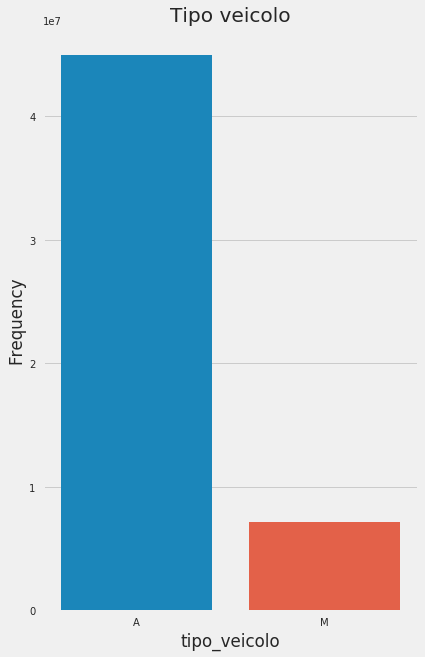

In [35]:
ax = sns.countplot(x="tipo_veicolo",  data=parco)
ax.set_title("Tipo veicolo")
ax.set_ylabel("Frequency")

### - destinazione

Questa colonna contiene la destinazione del veicolo. Per destinazione del veicolo s'intende la sua utilizzazione in base alle caratteristiche tecniche. 

Per A gli autoveicoli: 

- AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO, 
- AUTOVEICOLO USO ESCLUSIVO DI POLIZIA
- AUTOVETTURA PER TRASPORTO DI PERSONE
- AUTOBUS PER TRASPORTO DI PERSONE 
- AUTOCARRO PER TRASPORTO DI COSE
- AUTOCARAVAN
- AUTOVEICOLO PER USO SPECIALE
- TRAS.SPECIFICO PERSONE PART.CONDIZIONI
- AUTOVEIC. TRASP. PROMISCUO PERSONE/COSE 
- TRATTORE STRADALE PER RIMORCHIO,TRATTORE PER SEMIRIMORCHIO . 

Per M i Motoveicoli: 

- QUADRICICLO PER TRASPORTO DI PERSONE
- QUADRICICLO PER TRASPORTO DI COSE
- QUADRICICLO PER USO SPECIALE,QUADRICICLO TRASPORTO SPECIFICO
- MOTOVEICOLO USO ESCLUSIVO DI POLIZIA
- TRICICLO PER TRASPORTO PROMISCUO
- TRICICLO PER USO SPECIALE
- TRICICLO PER TRASPORTO SPECIFICO
- MOTOCICLO PER TRASPORTO PERSONE
- TRICICLO PER TRASPORTO COSE
- TRICICLO PER TRASPORTO DI PERSONE.

In [69]:
print ("record nulli: "+ str(parco.destinazione.isnull().sum()) + 
       " - : "+ str(round((parco.destinazione.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 31003 - : 0.06% 


In [59]:
auto.destinazione.value_counts()

AUTOVETTURA PER TRASPORTO DI PERSONE                     39161407
AUTOCARRO PER TRASPORTO DI COSE                           4151272
AUTOVEIC.TRASP.PROMISCUO PERSONE/COSE                      601596
AUTOCARAVAN                                                279698
AUTOVEICOLO PER TRASPORTO SPECIFICO                        274121
AUTOVEICOLO PER USO SPECIALE                               193042
TRATTORE PER SEMIRIMORCHIO                                 167726
AUTOBUS PER TRASPORTO DI PERSONE                            96479
AUTOVEICOLO USO ESCLUSIVO DI POLIZIA                         7849
TRAS.SPECIFICO PERSONE PART.CONDIZIONI                       4964
TRATTORE STRADALE PER RIMORCHIO                               488
AUTOVEICOLO IN SERVIZIO PUBBLICO DI LINEA INTEGRATIVO         346
VEICOLO SPECIALE USO AUTOSCUOLA                                77
AUTOVEICOLO PER USO SPECIALE DELLA POLIZIA LOCALE              29
Name: destinazione, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'fig'

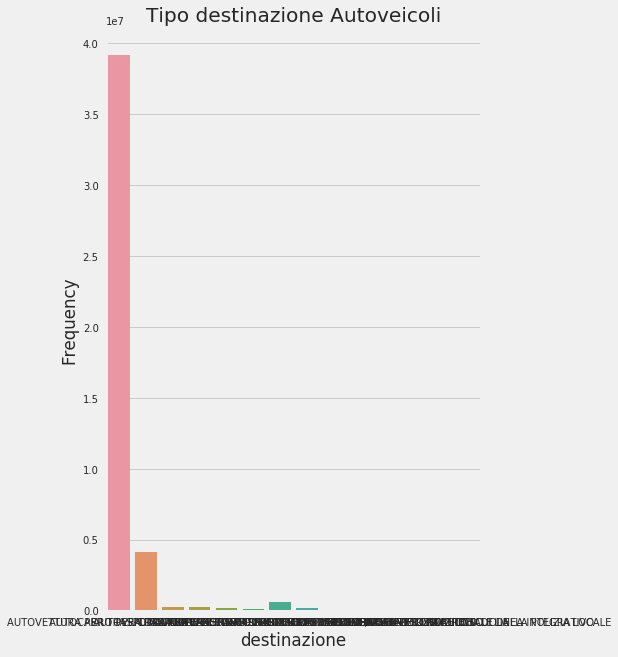

In [44]:
ax = sns.countplot(x="destinazione",  data=auto)
ax.set_title("Tipo destinazione Autoveicoli")
ax.set_ylabel("Frequency")

ax.fig.get_axes()[0].set_yscale('log')

AttributeError: 'AxesSubplot' object has no attribute 'fig'

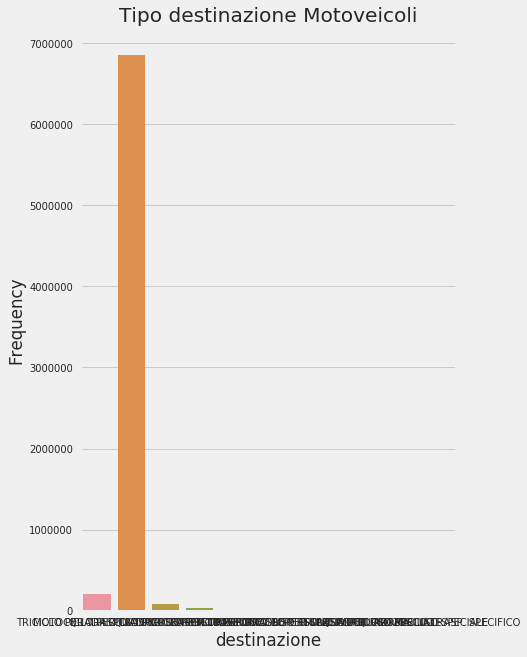

In [45]:
ax = sns.countplot(x="destinazione",  data=moto)
ax.set_title("Tipo destinazione Motoveicoli")
ax.set_ylabel("Frequency")
ax.fig.get_axes()[0].set_yscale('log')

### - uso 

Questa colonna contiene il tipo d'uso del veicolo. 

Per uso del veicolo s'intende la sua utilizzazione economica. I veicoli possono essere adibiti a uso proprio o a uso di terzi. 
- Proprio
- Di terzi da noleggio con conducente
- di terzi da locare senza conducente
- Di terzi
- Di terzi con autorizzazione vincolate
- Di terzi con autorizzazione libera
- Uso speciale

In [72]:
print ("record nulli: "+ str(parco.uso.isnull().sum()) + 
       " - : "+ str(round((parco.uso.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 31043 - : 0.06% 


Text(0,0.5,'Frequency')

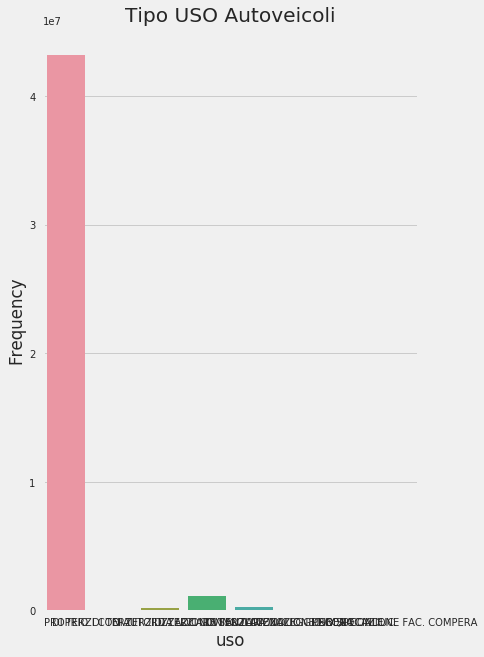

In [46]:
ax = sns.countplot(x="uso",  data=auto)
ax.set_title("Tipo USO Autoveicoli")
ax.set_ylabel("Frequency")


In [ ]:
ax = sns.countplot(x="uso",  data=moto)
ax.set_title("Tipo Uso Motoveicoli")
ax.set_ylabel("Frequency")

### - comune residenza 

Questa colonna contiene il comune dove risiede l'intestatario del veicolo

In [73]:
print ("record nulli: "+ str(parco.comune_residenza.isnull().sum()) + 
       " - : "+ str(round((parco.comune_residenza.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 17731 - : 0.03% 


### - provincia residenza

Questa colonna contiene la provincia dove risiede l'intestatario del veicolo

In [74]:
print ("record nulli: "+ str(parco.provincia_residenza.isnull().sum()) + 
       " - : "+ str(round((parco.provincia_residenza.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 0 - : 0.0% 


### - età intestatario

Questa colonna contiene l'età dell'intestatario del veicolo alla data di produzione del dataset

In [75]:
print ("record nulli: "+ str(parco.eta_intestatario.isnull().sum()) + 
       " - : "+ str(round((parco.eta_intestatario.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 5852393 - : 11.22% 


### - sesso

Questa colonna contiene il sesso dell'intestatario del veicolo

In [76]:
print ("record nulli: "+ str(parco.sesso.isnull().sum()) + 
       " - : "+ str(round((parco.sesso.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 6144681 - : 11.78% 


### - marca

Questa colonna contiene la marca del veicolo

In [77]:
print ("record nulli: "+ str(parco.marca.isnull().sum()) + 
       " - : "+ str(round((parco.marca.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 2946408 - : 5.65% 


In [61]:
auto.marca.value_counts()

FIAT - INNOCENTI                                                11775799
FORD                                                             3165904
VOLKSWAGEN                                                       2970088
OPEL                                                             2461750
RENAULT                                                          2374495
LANCIA - AUTOBIANCHI                                             1984163
PEUGEOT                                                          1820632
CITROEN                                                          1753210
MERCEDES                                                         1710339
TOYOTA                                                           1598468
ALFA ROMEO                                                       1228028
NISSAN                                                           1201664
AUDI                                                             1149314
IVECO - FIAT                                       

In [86]:
moto.marca.value_counts()

HONDA                                                           1107928
PIAGGIO                                                         1002628
YAMAHA                                                           696322
KYMCO                                                            391694
APRILIA                                                          356122
SUZUKI                                                           333506
BMW                                                              219144
DUCATI                                                           168795
KAWASAKI                                                         140434
HARLEY-DAVIDSON                                                  112122
MALAGUTI                                                         101891
MBK                                                               88404
KTM                                                               85948
SANYANG                                                         

### - cilindrata

Questa colonna contiene la cilindrata del veicolo misurata in centimetro cubo (cm3).

In [78]:
print ("record nulli: "+ str(parco.cilindrata.isnull().sum()) + 
       " - : "+ str(round((parco.cilindrata.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 69755 - : 0.13% 


### - alimentazione

Questa colonna contiene l'alimentazione del motore del veicolo, ossia il tipo di combustibile 
- GASOLIO/METANO
- GASOLIO/GPL
- BENZINA
- BENZINA/OLIO
- BENZINA/WANK
- ELETTRICA
- GASOLIO
- GPL
- BENZINA/GPL
- BENZINA/METANO
- METANO
- MISCELA
- PETROLIO
- IBRIDO BENZINA/ELETTRICO
- IBRIDO GASOLIO/ELETTRICO
- BENZINA/ETANOLO

In [79]:
print ("record nulli: "+ str(parco.alimentazione.isnull().sum()) + 
       " - : "+ str(round((parco.alimentazione.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 48578 - : 0.09% 


### - data immatricolazione

Questa colonna contiene la data di immatricolazione del veicolo

In [80]:
print ("record nulli: "+ str(parco.data_immatricolazione.isnull().sum()) + 
       " - : "+ str(round((parco.data_immatricolazione.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 134237 - : 0.26% 


In [ ]:
#SEt data immatricolazione as index
auto = auto.set_index('data_immatricolazione')

In [37]:
# ci sono delle stagionalità sulle immatricolazioni?
monthly = auto.resample(rule='M').count()

### - classe euro

Questa colonna contiene la classe ambientale di appartenenza (categoria Euro) di autoveicoli:

- pre-Euro 1, Euro 1, Euro 2, Euro 3, Euro 4, Euro 5, Euro 6

e motoveicoli 
- pre-Euro 1, Euro 1, Euro 2, Euro 3

definita dalle direttive europee rispettate nell'anno di produzione e che è riportata nel libretto di circolazione.

In [81]:
print ("record nulli: "+ str(parco.classe_euro.isnull().sum()) + 
       " - : "+ str(round((parco.classe_euro.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 14 - : 0.0% 


### - emissioni co2

Questa colonna contiene l’emissione CO2 del veicolo misurate in g/km ossia grammi al chilometro.

In [82]:
print ("record nulli: "+ str(parco.emissioni_co2.isnull().sum()) + 
       " - : "+ str(round((parco.emissioni_co2.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 18866494 - : 36.17% 


### - massa complessiva

Questa colonna contiene la massa complessiva del veicolo misurata attraverso il suo peso in chilogrammi (Kg). 

Si definisce massa complessiva la massa del veicolo in ordine di marcia (tara) più tutto il suo carico (portata).

In [83]:
print ("record nulli: "+ str(parco.massa_complessiva.isnull().sum()) + 
       " - : "+ str(round((parco.massa_complessiva.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 258589 - : 0.5% 


### - revisone in regola s/n

Questa colonna contiene lo stato dell'obbligo di revisione del veicolo (S= SI, N=NO) ai fini della circolazione.

In [84]:
print ("record nulli: "+ str(parco.revisione_in_regola.isnull().sum()) + 
       " - : "+ str(round((parco.revisione_in_regola.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 0 - : 0.0% 


### - assicurazione in regola s/n

Questa colonna contiene lo stato dell'obbligo dell'assicurazione del veicolo (S= SI, N=NO) ai fini della circolazione.

In [85]:
print ("record nulli: "+ str(parco.assicurazione_in_regola.isnull().sum()) + 
       " - : "+ str(round((parco.assicurazione_in_regola.isnull().sum()/len(parco)*100),2))+ "% ")

record nulli: 0 - : 0.0% 


In [16]:
auto['eta_intestatario'].describe()

count    4.631280e+07
mean     5.372625e+01
std      1.463911e+01
min      0.000000e+00
25%      4.300000e+01
50%      5.300000e+01
75%      6.400000e+01
max      2.017000e+03
Name: eta_intestatario, dtype: float64

In [43]:
from time import time
t = time()
auto.head()
final = time() - t
print("total ", final)

total  0.0006182193756103516


In [46]:
auto = parco[parco.tipo_veicolo=='A']

In [47]:
len(auto)

44961663

Sono 44.961.663 gli autoveicoli immatricolati nel nostro paese al 31 ottobre 2017.
Considerando che la popolazione italiana si stima essere 60.905.976 abitanti (al 21 ottobre 2016), 

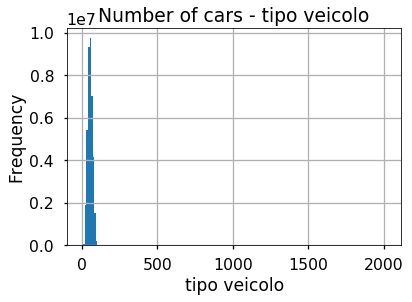

In [48]:
#Generate histograms 

auto.eta_intestatario.hist(bins=200)
plt.xlabel('tipo veicolo')
plt.ylabel('Frequency')
plt.title('Number of cars - tipo veicolo');

plt.show();

In [60]:
auto.uso.value_counts()

PROPRIO                                  43152207
DI TERZI DA LOCARE SENZA CONDUC.          1150721
DI TERZI CON AUTORIZZAZIONE LIBERA         279608
DI TERZI CON AUTORIZZAZIONI VINCOLATE      212676
DI TERZI                                    80883
DI TERZI DA NOLEGGIO CON CONDUC.            58698
USO SPECIALE                                 4277
PRIV.,LOCAZIONE FAC. COMPERA                    4
Name: uso, dtype: int64

In [52]:
tesla = parco[parco.marca=="TESLA MOTORS"]

In [54]:
len(tesla)

648

In [ ]:
auto_green = 

In [ ]:
parco.sesso.value_counts()

In [5]:
parco.regione_residenza.value_counts()

LOMBARDIA                8214282
LAZIO                    5341091
CAMPANIA                 4591254
SICILIA                  4487250
VENETO                   4052513
EMILIA-ROMAGNA           3859415
PIEMONTE                 3858373
TOSCANA                  3499371
PUGLIA                   3050018
CALABRIA                 1631868
TRENTINO-ALTO-ADIGE      1397194
LIGURIA                  1383184
MARCHE                   1379921
SARDEGNA                 1363193
ABRUZZO                  1170438
FRIULI-VENEZIA_GIULIA    1042494
UMBRIA                    824464
BASILICATA                476862
MOLISE                    289473
VALLE-D'AOSTA             252531
Name: regione_residenza, dtype: int64

In [ ]:
parco.destinazione.value_counts()

### Campi di interesse Parco Macchine: 

- revisione_in_regola, 

- assicurazione_in_regola      

In [4]:
parco.revisione_in_regola.value_counts()

S    39096194
N    13068995
Name: revisione_in_regola, dtype: int64

In [3]:
parco.assicurazione_in_regola.value_counts()

S    38151309
N    14013880
Name: assicurazione_in_regola, dtype: int64

In [ ]:
##
- Dove si trovano le auto con le revisioni da effettuare?
- Dove si trovano le auto con l'assicurazione da affettuare?
- Fare normalizzazione tra abitanti e veicoli
- vedere quali sono le regioni più inquinanti rapporttate con abitanti?

## Part 3 - Focus Auto ecologiche

#### Strip campo "alimentazione"

In [10]:
parco.alimentazione = parco.alimentazione.str.strip()

#### Definisco i valori del campo alimentazioni classificati come auto "ecologiche"

In [10]:
eco_labels = ['METANO',
              'ELETTR',
              'GPL',
              'B/GPL',
              'B/MET',
              'IBRIDO BENZINA/ELETTRICO',
              'IBRIDO GASOLIO/ELETTRICO']

#### ECO = dataframe con sottoinsieme di parco macchine eco
##### Seziono su eco_labels l'interno parco macchine, comprensivo sia di autoveicoli che motoveicoli

(A = Autoveicolo, M = Motoveicolo)

In [11]:
eco = parco.loc[parco['alimentazione'].isin(eco_labels)]

In [12]:
print (str(len(parco))+ " Veicoli totali - " +str(len(eco)) +" Veicoli ECOlogici")

52165189 Veicoli totali - 4259274 Veicoli ECOlogici


In [13]:
eco.tipo_veicolo.value_counts()

A    4247580
M      11694
Name: tipo_veicolo, dtype: int64

In [ ]:
"Percentuale autoveicoli ecologici: " +str(round(len(eco)/len(parco)*100,2))

In [14]:
eco.alimentazione.value_counts()

B/GPL                       2961127
B/MET                        991461
IBRIDO BENZINA/ELETTRICO     171181
METANO                       108573
ELETTR                        22332
IBRIDO GASOLIO/ELETTRICO       3778
GPL                             822
Name: alimentazione, dtype: int64

In [15]:
eco.head(5)

,id,progressivo,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,data_immatricolazione,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
7,1647844,4927106,A,AUTOCARAVAN,PROPRIO,PALIZZI,REGGIO DI CALABRIA,CALABRIA,62.000,M,FORD,1993.00,B/GPL,55.000,1992-02-18 00:00:00,0.000,NaN,2390.000,N,S
84,1647309,82688,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASALI DEL MANCO,COSENZA,CALABRIA,42.000,M,FIAT - INNOCENTI,1596.00,B/MET,76.000,2001-02-28 00:00:00,3.000,214,2050.000,N,N
175,1647404,1631179,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,DIAMANTE,COSENZA,CALABRIA,89.000,F,CHEVROLET,1399.00,B/GPL,61.000,2005-10-28 00:00:00,3.000,175,1500.000,N,N
193,1647422,1779267,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,COSENZA,COSENZA,CALABRIA,39.000,M,MAZDA,2967.00,B/GPL,145.000,2001-10-25 00:00:00,3.000,305,2075.000,N,N
209,1647438,1989672,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ACRI,COSENZA,CALABRIA,26.000,M,ALFA ROMEO,1368.00,B/GPL,88.000,2015-09-28 00:00:00,6.000,133,1820.000,S,S


#### Rimuovo la colonna progressivo e id che non ci servono

*progressivo* = Questa colonna contiene il numero progressivo del veicolo come record nel dataset

In [19]:
eco = eco.drop('progressivo', axis=1)

In [21]:
eco = eco.drop('id', axis=1)

In [22]:
eco

,tipo_veicolo,destinazione,uso,comune_residenza,provincia_residenza,regione_residenza,eta_intestatario,sesso,marca,cilindrata,alimentazione,kw,data_immatricolazione,classe_euro,emissioni_co2,massa_complessiva,revisione_in_regola,assicurazione_in_regola
7,A,AUTOCARAVAN,PROPRIO,PALIZZI,REGGIO DI CALABRIA,CALABRIA,62.000,M,FORD,1993.00,B/GPL,55.000,1992-02-18 00:00:00,0.000,NaN,2390.000,N,S
84,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASALI DEL MANCO,COSENZA,CALABRIA,42.000,M,FIAT - INNOCENTI,1596.00,B/MET,76.000,2001-02-28 00:00:00,3.000,214,2050.000,N,N
175,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,DIAMANTE,COSENZA,CALABRIA,89.000,F,CHEVROLET,1399.00,B/GPL,61.000,2005-10-28 00:00:00,3.000,175,1500.000,N,N
193,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,COSENZA,COSENZA,CALABRIA,39.000,M,MAZDA,2967.00,B/GPL,145.000,2001-10-25 00:00:00,3.000,305,2075.000,N,N
209,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ACRI,COSENZA,CALABRIA,26.000,M,ALFA ROMEO,1368.00,B/GPL,88.000,2015-09-28 00:00:00,6.000,133,1820.000,S,S
216,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CROTONE,CROTONE,CALABRIA,51.000,F,SUZUKI,1586.00,B/GPL,79.000,2009-12-09 00:00:00,4.000,159,1650.000,S,S
279,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,SETTINGIANO,CATANZARO,CALABRIA,50.000,F,NISSAN,1240.00,B/GPL,48.000,2008-04-30 00:00:00,4.000,139,1475.000,S,S
296,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,ACRI,COSENZA,CALABRIA,85.000,M,FIAT - INNOCENTI,1108.00,B/MET,37.000,2006-11-23 00:00:00,0.000,NaN,1200.000,S,S
302,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,CASABONA,CROTONE,CALABRIA,70.000,M,SUZUKI,1590.00,B/GPL,55.000,1990-02-05 00:00:00,0.000,NaN,1450.000,S,S
333,A,AUTOVETTURA PER TRASPORTO DI PERSONE,PROPRIO,AMANTEA,COSENZA,CALABRIA,49.000,F,OPEL,1598.00,B/GPL,74.000,2004-05-05 00:00:00,4.000,175,1855.000,S,S


In [24]:
len(eco)

4259274

#### Salvo il dataset derivato "auto_eco" solo con gli autoveicoli ecologici

In [26]:
eco.to_csv('../data/output/eco_2017.csv',sep=';', encoding='utf-8', index=False)